## This jupiternotebook contains the original separately conceived code for each of the models our group decided to explore. The first three cells are the respective models running in the enviroment their builder made, and the fourth cell is a combination of solutions from the three above to run all three models with their respective parameters to get a decent foundation for comparison in the report.

Training data:     80 rows
Test data:         10 rows
Validation data:   10 rows

--- Model Evaluation ---

TRAINING (1–80) Performance:
Tablet Hardness (N): R2=0.990, MAE=0.075, MSE=0.010
Tablet Height (mm): R2=0.992, MAE=0.068, MSE=0.008
Tablet Friability (%): R2=0.975, MAE=0.132, MSE=0.025

TEST (81–90) Performance:
Tablet Hardness (N): R2=0.990, MAE=0.078, MSE=0.010
Tablet Height (mm): R2=0.992, MAE=0.071, MSE=0.008
Tablet Friability (%): R2=0.971, MAE=0.135, MSE=0.025

VALIDATION (91–100) Performance:
Tablet Hardness (N): R2=0.988, MAE=0.079, MSE=0.012
Tablet Height (mm): R2=0.993, MAE=0.060, MSE=0.007
Tablet Friability (%): R2=0.966, MAE=0.134, MSE=0.026

Model coefficients (impact of each X on each Y):
                       Press Force (kg)  Motor Speed (tablets/min)  \
Tablet Hardness (N)            0.569206                  -0.103795   
Tablet Height (mm)            -0.610147                   0.092187   
Tablet Friability (%)         -0.594424                   0.379596   



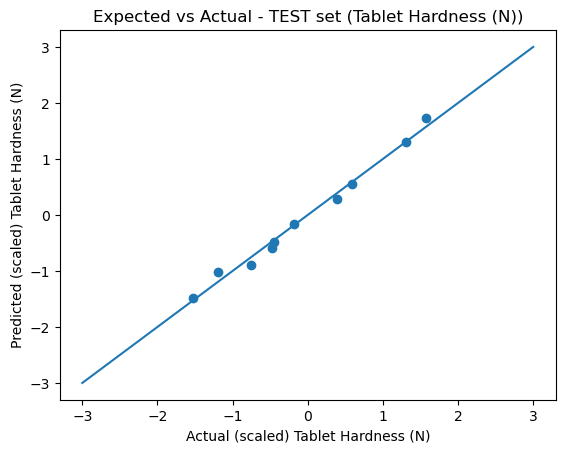

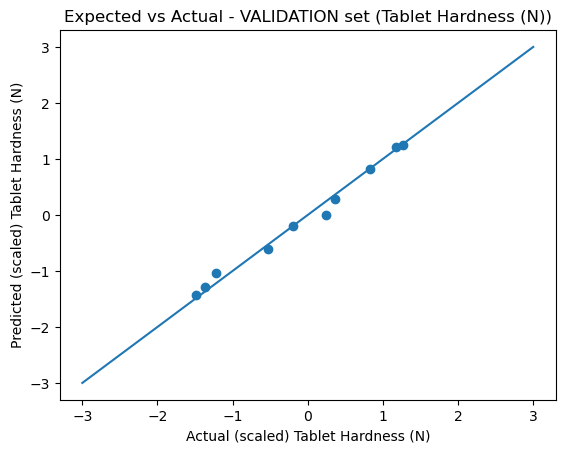

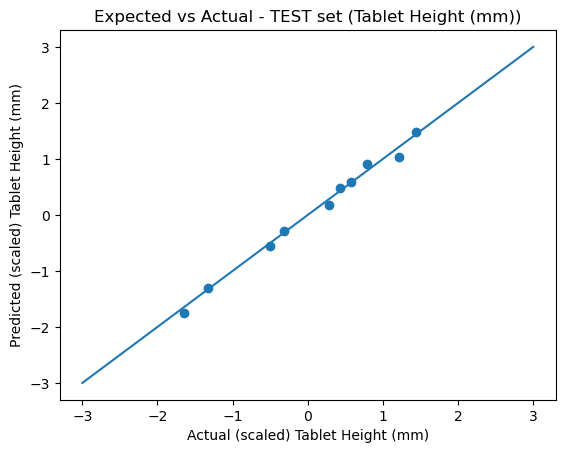

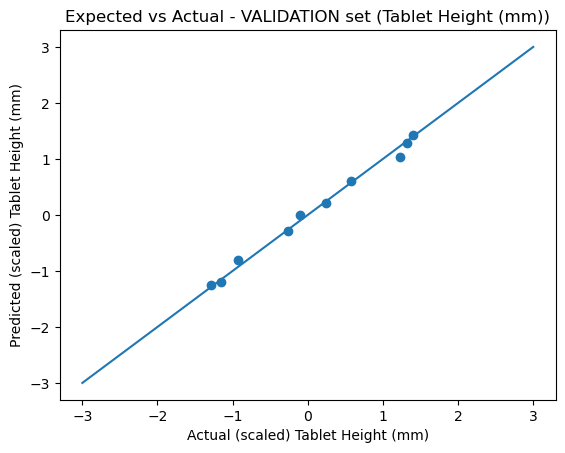

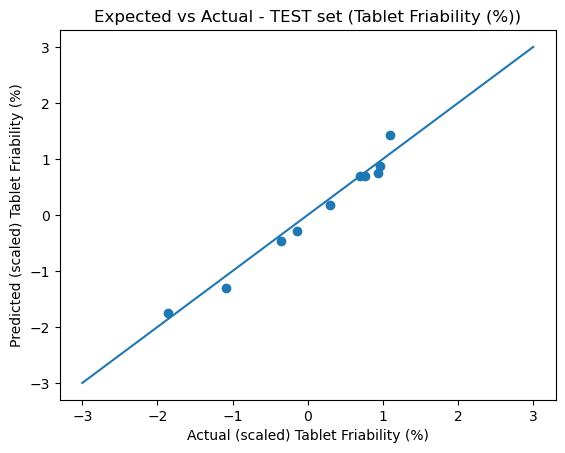

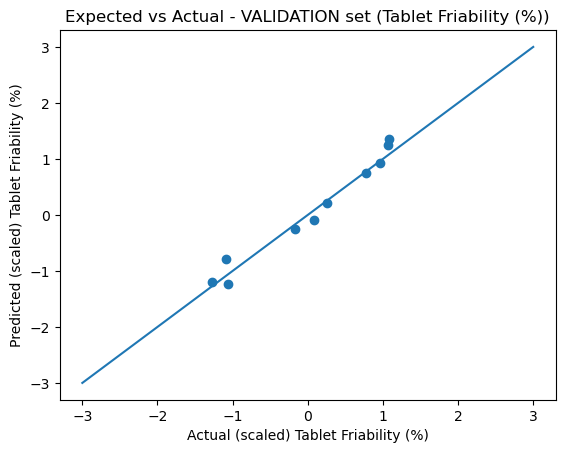

In [27]:
# Linear Regression (Vestfold, Eileen & Alexander)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

df = pd.read_excel('Tablet examination.xlsx')

X = df[['Press Force (kg)', 'Motor Speed (tablets/min)', 'Particle Size (μm)']]
y = df[['Tablet Hardness (N)', 'Tablet Height (mm)', 'Tablet Friability (%)']]

X_train = X.iloc[0:80]
X_test  = X.iloc[80:90]
X_val   = X.iloc[90:100]

y_train = y.iloc[0:80]
y_test  = y.iloc[80:90]
y_val   = y.iloc[90:100]

print(f"Training data:     {X_train.shape[0]} rows")
print(f"Test data:         {X_test.shape[0]} rows")
print(f"Validation data:   {X_val.shape[0]} rows")

scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
y_train_scaled = scaler_y.fit_transform(y_train)

X_test_scaled = scaler_X.transform(X_test)
y_test_scaled = scaler_y.transform(y_test)

X_val_scaled = scaler_X.transform(X_val)
y_val_scaled = scaler_y.transform(y_val)

model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)
y_pred_val = model.predict(X_val_scaled)

print("\n--- Model Evaluation ---")

def print_scores(y_true, y_pred, dataset_name):
    print(f"\n{dataset_name} Performance:")
    for i, col in enumerate(y.columns):
        r2 = r2_score(y_true[:, i], y_pred[:, i])
        mae = mean_absolute_error(y_true[:, i], y_pred[:, i])
        mse = mean_squared_error(y_true[:, i], y_pred[:, i])
        print(f"{col}: R2={r2:.3f}, MAE={mae:.3f}, MSE={mse:.3f}")

print_scores(y_train_scaled, y_pred_train, "TRAINING (1–80)")
print_scores(y_test_scaled, y_pred_test, "TEST (81–90)")
print_scores(y_val_scaled, y_pred_val, "VALIDATION (91–100)")

coefficients = pd.DataFrame(model.coef_, index=y.columns, columns=X.columns)
print("\nModel coefficients (impact of each X on each Y):")
print(coefficients)

print("\nIntercept (scaled output space):")
print(model.intercept_)

for i, col in enumerate(y.columns):

    plt.figure()
    plt.scatter(y_test_scaled[:, i], y_pred_test[:, i])
    plt.xlabel(f"Actual (scaled) {col}")
    plt.ylabel(f"Predicted (scaled) {col}")
    plt.title(f"Expected vs Actual - TEST set ({col})")
    plt.plot([-3, 3], [-3, 3]) 
    plt.show()

    plt.figure()
    plt.scatter(y_val_scaled[:, i], y_pred_val[:, i])
    plt.xlabel(f"Actual (scaled) {col}")
    plt.ylabel(f"Predicted (scaled) {col}")
    plt.title(f"Expected vs Actual - VALIDATION set ({col})")
    plt.plot([-3, 3], [-3, 3])
    plt.show()


Treningsdata: 80 rader
Testdata: 10 rader
Valideringsdata: 10 rader
Trener modellen...
Trening fullført etter 145 iterasjoner
Final loss: 0.003923
EVALUERING PÅ TESTDATA (Rad 81-90):

Hardness:
  MSE: 1.7082
  RMSE: 1.3070
  R²: 0.9922
  Eksempel (faktisk vs predikert):
    68.60 vs 66.49
    81.90 vs 81.86
    57.70 vs 60.00

Height:
  MSE: 0.0014
  RMSE: 0.0375
  R²: 0.9934
  Eksempel (faktisk vs predikert):
    5.56 vs 5.58
    5.14 vs 5.16
    5.86 vs 5.78

Friability:
  MSE: 0.0002
  RMSE: 0.0124
  R²: 0.9855
  Eksempel (faktisk vs predikert):
    0.39 vs 0.39
    0.29 vs 0.30
    0.41 vs 0.41

 FINAL VALIDERING PÅ VALIDERINGSDATA (Rad 91-100):

Hardness:
  MSE: 1.1796
  RMSE: 1.0861
  R²: 0.9948

Height:
  MSE: 0.0012
  RMSE: 0.0344
  R²: 0.9944

Friability:
  MSE: 0.0001
  RMSE: 0.0104
  R²: 0.9885


/var/folders/rt/s_m0p6nd2_zfd93_pgkx_82h0000gn/T/ipykernel_44931/3639825735.py:122: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 3, 1)


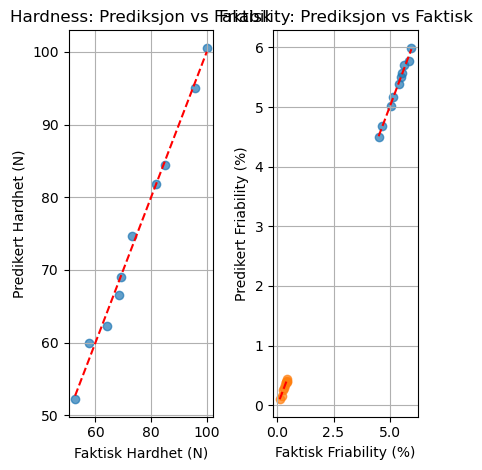


 TRENINGSDATA (Rad 1-80):
  Hardness: R² = 0.9935
  Height: R² = 0.9945
  Friability: R² = 0.9872

 TESTDATA (Rad 81-90):
  Hardness: R² = 0.9922
  Height: R² = 0.9934
  Friability: R² = 0.9855

 VALIDERINGSDATA (Rad 91-100):
  Hardness: R² = 0.9948
  Height: R² = 0.9944
  Friability: R² = 0.9885


In [28]:
# Multi-Layer Perceptron Regressor (Kongsberg, Mohamed)
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

df = pd.read_excel('Tablet examination.xlsx')


X = df[['Press Force (kg)', 'Motor Speed (tablets/min)', 'Particle Size (μm)']]
y = df[['Tablet Hardness (N)', 'Tablet Height (mm)', 'Tablet Friability (%)']]

#train test val split
X_train = X.iloc[0:80]      
X_test = X.iloc[80:90]        
X_val = X.iloc[90:100]      

y_train = y.iloc[0:80]      
y_test = y.iloc[80:90]      
y_val = y.iloc[90:100]      

print(f"Treningsdata: {X_train.shape[0]} rader")
print(f"Testdata: {X_test.shape[0]} rader")
print(f"Valideringsdata: {X_val.shape[0]} rader")


#scale data
scaler_X = StandardScaler()
scaler_y = StandardScaler()

#fit kun på treningsdata
X_train_scaled = scaler_X.fit_transform(X_train)
y_train_scaled = scaler_y.fit_transform(y_train)

# test og validerings data samme scale
X_test_scaled = scaler_X.transform(X_test)
y_test_scaled = scaler_y.transform(y_test)

X_val_scaled = scaler_X.transform(X_val)
y_val_scaled = scaler_y.transform(y_val)


#initialise MLP modellen
model = MLPRegressor(
    hidden_layer_sizes=(100, 50),    # 2 skjulte lag
    activation='relu',
    solver='adam',
    learning_rate_init=0.001,
    max_iter=2000,
    random_state=42,
    early_stopping=True,
    validation_fraction=0.1,         
    n_iter_no_change=50
)


print("Trener modellen...")
training_history = model.fit(X_train_scaled, y_train_scaled)

print(f"Trening fullført etter {model.n_iter_} iterasjoner")
print(f"Final loss: {model.loss_:.6f}")


#prediction på testsett
y_test_pred_scaled = model.predict(X_test_scaled)

#transform tilbake til original skala
y_test_pred = scaler_y.inverse_transform(y_test_pred_scaled)

#evaluering for hver output variabel
target_names = ['Hardness', 'Height', 'Friability']
print("EVALUERING PÅ TESTDATA (Rad 81-90):")
print("=" * 50)

for i, target in enumerate(target_names):
    mse = mean_squared_error(y_test.iloc[:, i], y_test_pred[:, i])
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test.iloc[:, i], y_test_pred[:, i])
    
    print(f"\n{target}:")
    print(f"  MSE: {mse:.4f}")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  R²: {r2:.4f}")
    
    
    print(f"  Eksempel (faktisk vs predikert):")
    for j in range(min(3, len(y_test))):
        actual = y_test.iloc[j, i]
        predicted = y_test_pred[j, i]
        print(f"    {actual:.2f} vs {predicted:.2f}")
        
        

y_val_pred_scaled = model.predict(X_val_scaled)
y_val_pred = scaler_y.inverse_transform(y_val_pred_scaled)

print("\n FINAL VALIDERING PÅ VALIDERINGSDATA (Rad 91-100):")
print("=" * 60)

for i, target in enumerate(target_names):
    mse = mean_squared_error(y_val.iloc[:, i], y_val_pred[:, i])
    rmse = np.sqrt(mse)
    r2 = r2_score(y_val.iloc[:, i], y_val_pred[:, i])
    
    print(f"\n{target}:")
    print(f"  MSE: {mse:.4f}")
    print(f"  RMSE: {rmse:.4f}") 
    print(f"  R²: {r2:.4f}")
    



plt.subplot(1, 2, 1)
plt.plot(training_history.loss_curve_)
plt.title('Treningsloss over iterasjoner')
plt.xlabel('Iterasjoner')
plt.ylabel('Loss')
plt.grid(True)

plt.subplot(1, 3, 1)
plt.scatter(y_test['Tablet Hardness (N)'], y_test_pred[:, 0], alpha=0.7)
plt.plot([y_test['Tablet Hardness (N)'].min(), y_test['Tablet Hardness (N)'].max()],
         [y_test['Tablet Hardness (N)'].min(), y_test['Tablet Hardness (N)'].max()], 'r--')
plt.xlabel('Faktisk Hardhet (N)')
plt.ylabel('Predikert Hardhet (N)')
plt.title('Hardness: Prediksjon vs Faktisk')
plt.grid(True)

plt.subplot(1, 3, 2)
plt.scatter(y_test['Tablet Height (mm)'], y_test_pred[:, 1], alpha=0.7)
plt.plot([y_test['Tablet Height (mm)'].min(), y_test['Tablet Height (mm)'].max()],
         [y_test['Tablet Height (mm)'].min(), y_test['Tablet Height (mm)'].max()], 'r--')
plt.xlabel('Faktisk Høyde (mm)')
plt.ylabel('Predikert Høyde (mm)')
plt.title('Height: Prediksjon vs Faktisk')
plt.grid(True)

plt.scatter(y_test['Tablet Friability (%)'], y_test_pred[:, 2], alpha=0.7)
plt.plot([y_test['Tablet Friability (%)'].min(), y_test['Tablet Friability (%)'].max()],
         [y_test['Tablet Friability (%)'].min(), y_test['Tablet Friability (%)'].max()], 'r--')
plt.xlabel('Faktisk Friability (%)')
plt.ylabel('Predikert Friability (%)')
plt.title('Friability: Prediksjon vs Faktisk')
plt.grid(True)

plt.tight_layout()
plt.show()


def evaluate_model(X, y, dataset_name):
    X_scaled = scaler_X.transform(X)
    y_pred_scaled = model.predict(X_scaled)
    y_pred = scaler_y.inverse_transform(y_pred_scaled)
    
    print(f"\n {dataset_name}:")
    for i, target in enumerate(target_names):
        r2 = r2_score(y.iloc[:, i], y_pred[:, i])
        print(f"  {target}: R² = {r2:.4f}")

evaluate_model(X_train, y_train, "TRENINGSDATA (Rad 1-80)")
evaluate_model(X_test, y_test, "TESTDATA (Rad 81-90)")  
evaluate_model(X_val, y_val, "VALIDERINGSDATA (Rad 91-100)")    




Treningsdata: 80 rader
Testdata: 10 rader
Valideringsdata: 10 rader

 --0--
Random Forest for 0
Test MSE: 0.0319
Test MAE: 0.0969
Test R²: 0.9993


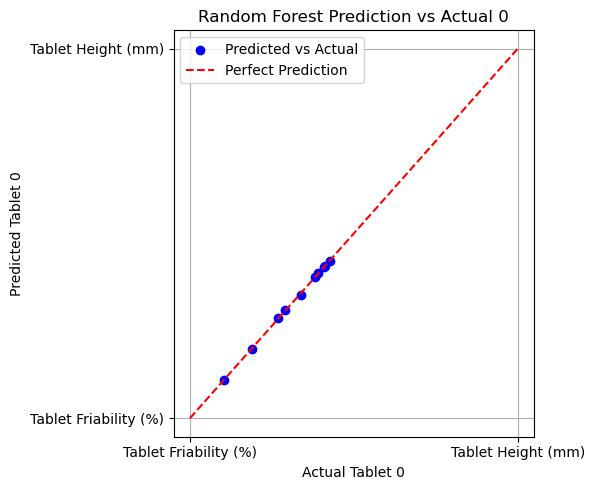

Features:
  Press Force (kg): 0.3017
  Motor Speed (tablets/min): 0.4959
  Particle Size (μm): 0.2024

 --1--
Random Forest for 1
Test MSE: 0.0319
Test MAE: 0.0969
Test R²: 0.9993


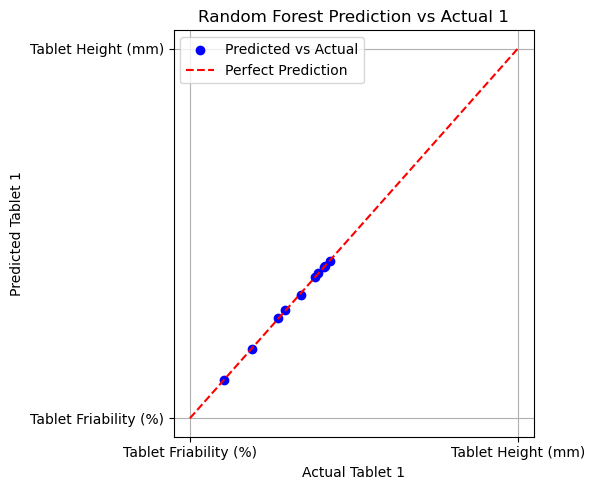

Features:
  Press Force (kg): 0.3017
  Motor Speed (tablets/min): 0.4959
  Particle Size (μm): 0.2024

 --2--
Random Forest for 2
Test MSE: 0.0319
Test MAE: 0.0969
Test R²: 0.9993


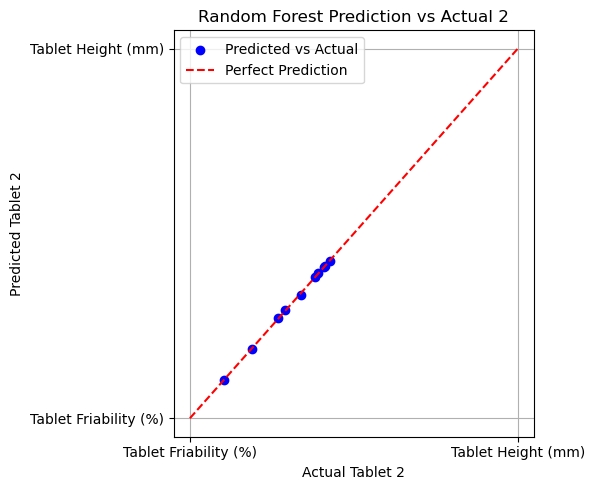

Features:
  Press Force (kg): 0.3017
  Motor Speed (tablets/min): 0.4959
  Particle Size (μm): 0.2024

--Summary Table--
Model   Random Forest
Target               
0               0.999
1               0.999
2               0.999


In [29]:
# Random Forest Regressor (Kongsberg, Sulaf)
"""Created on Wed Oct 22 03:37:26 2025 @author: Sulaf"""

#libraries inkluded and used for the project 
#for anaylyse av data:
import pandas as pd #for anaylyse av data
import numpy as np 
#visualizing tool:
import matplotlib.pyplot as plt
#for file handling:
import os
#machinelearning models (random forrest)
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

df = pd.read_excel('Tablet examination.xlsx')


X = df[['Press Force (kg)', 'Motor Speed (tablets/min)', 'Particle Size (μm)']]
y = df[['Tablet Hardness (N)', 'Tablet Height (mm)', 'Tablet Friability (%)']]

#train test val split
X_train = X.iloc[0:80]      
X_test = X.iloc[80:90]        
X_val = X.iloc[90:100]      

y_train = y.iloc[0:80]      
y_test = y.iloc[80:90]      
y_val = y.iloc[90:100]      

print(f"Treningsdata: {X_train.shape[0]} rader")
print(f"Testdata: {X_test.shape[0]} rader")
print(f"Valideringsdata: {X_val.shape[0]} rader")


#scale data
scaler_X = StandardScaler()
scaler_y = StandardScaler()

#fit kun på treningsdata
X_train_scaled = scaler_X.fit_transform(X_train)
y_train_scaled = scaler_y.fit_transform(y_train)

# test og validerings data samme scale
X_test_scaled = scaler_X.transform(X_test)
y_test_scaled = scaler_y.transform(y_test)

X_val_scaled = scaler_X.transform(X_val)
y_val_scaled = scaler_y.transform(y_val)

target_names = ['Hardness', 'Height', 'Friability']


#define the Random Forest model
model_name ="Random Forest"
model = RandomForestRegressor(n_estimators=100, random_state=42)

# keeps the results stored
results = []

#train and evaluate for each target
for target_name, y in enumerate(target_names):

    model.fit(X_train, y_train)
    y_pred_test = model.predict(X_test)
    y_pred_val = model.predict(X_val)

    mse = mean_squared_error(y_test, y_pred_test)
    mae = mean_absolute_error(y_test, y_pred_test)
    r2 = r2_score(y_test, y_pred_test)

    results.append({
        "Target": target_name,
        "Model": model_name,
        "MSE": mse,
        "MAE": mae,
        "R²": r2
    })

    print(f"\n --{target_name}--")
    print(f"{model_name} for {target_name}")
    print("Test MSE:", round(mse, 4))
    print("Test MAE:", round(mae, 4))
    print("Test R²:", round(r2,4))

    #plot predicted vs actual output (expectation vs reality)
    plt.figure(figsize=(6, 5))
    plt.scatter(y_test, y_pred_test, color='blue', label='Predicted vs Actual')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
    plt.xlabel(f"Actual Tablet {target_name}")
    plt.ylabel(f"Predicted Tablet {target_name}")
    plt.title(f"{model_name} Prediction vs Actual {target_name}")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    #features, shows how much each feature contributed to reducing the prediction error
    importances = model.feature_importances_ #gives a numeric score for each feature
    print("Features:")
    for feat, imp in zip(X.columns, importances):
        print(f"  {feat}: {round(imp, 4)}")

#summary table
results_df = pd.DataFrame(results)
print("\n--Summary Table--")
print(results_df.pivot(index="Target", columns="Model", values="R²").round(3))

# The following code is a amalgamation of the three separately built models with elements from each as far as reading in and visualizing/measuring the performance. We decided to put all three models with their respective parameters through a single, otherwise identical code to get easily visualizable data for the report. The output R2, MSE and MAE values have been cross referenced with the corrected output in the respective models source code to ensure it is consistent.

# Just replace the model in the commented code blocks respective to the model you want output values for and run the cell.

Training data:     80 rows
Test data:         10 rows
Validation data:   10 rows

--- Model Evaluation ---

TEST (81–90) Performance:
Tablet Hardness (N): R2=0.9922, MAE=1.0113, MSE=1.7082
Tablet Height (mm): R2=0.9934, MAE=0.0307, MSE=0.0014
Tablet Friability (%): R2=0.9855, MAE=0.0099, MSE=0.0002

VALIDATION (91–100) Performance:
Tablet Hardness (N): R2=0.9948, MAE=0.8253, MSE=1.1796
Tablet Height (mm): R2=0.9944, MAE=0.0245, MSE=0.0012
Tablet Friability (%): R2=0.9885, MAE=0.0088, MSE=0.0001


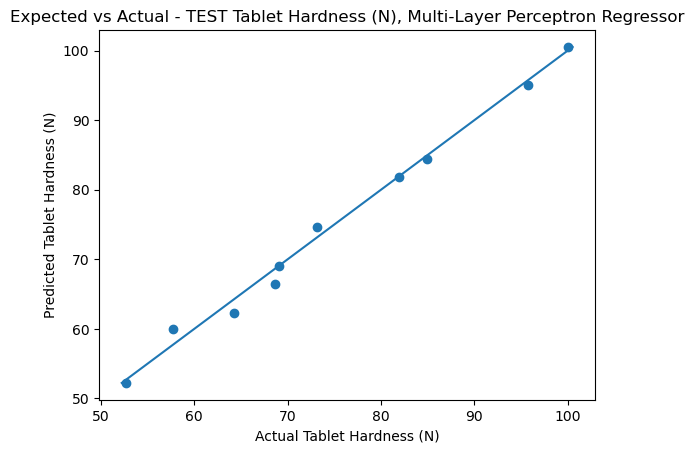

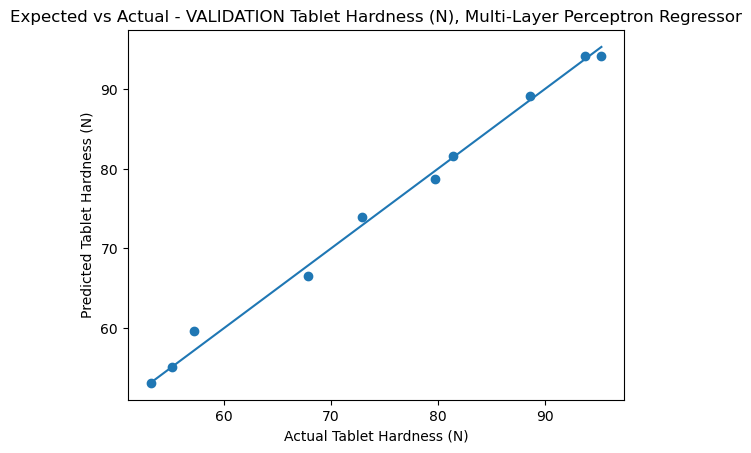

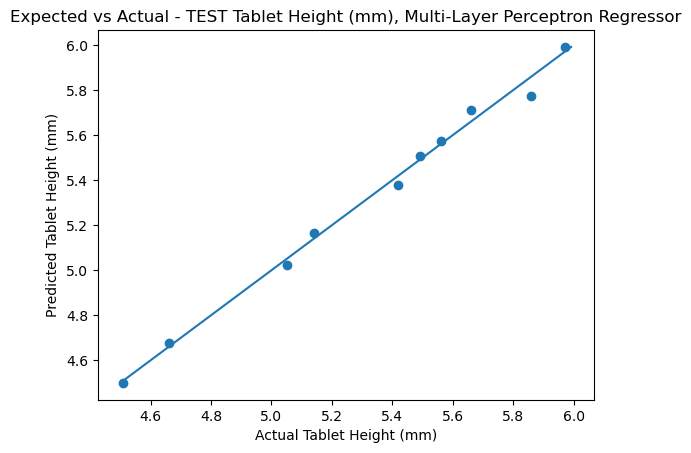

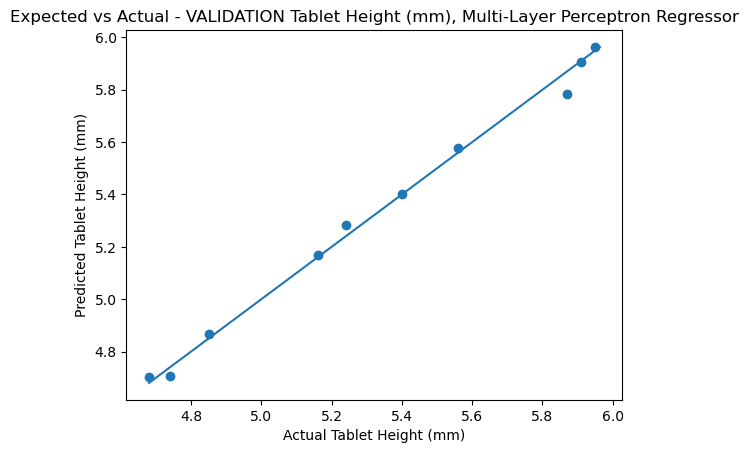

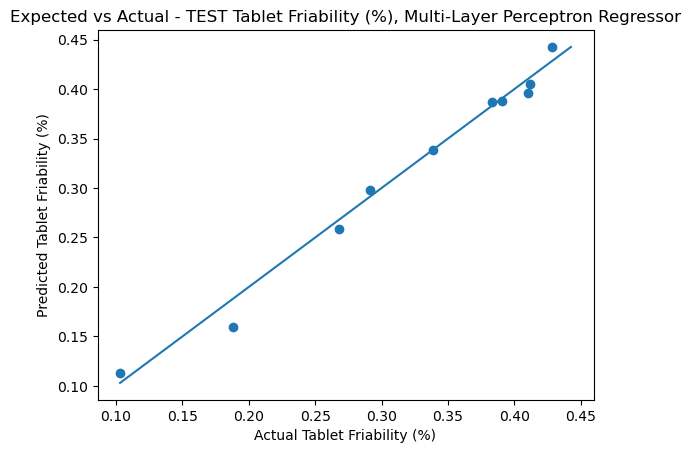

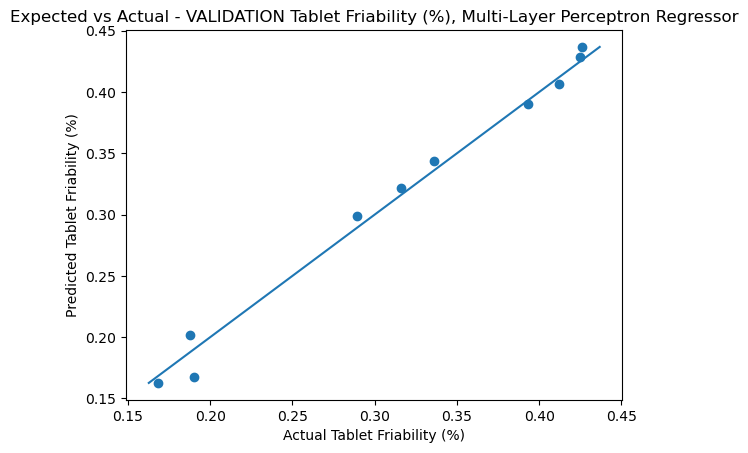

In [35]:
# Combined Model Evaluation Code
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

df = pd.read_excel('Tablet examination.xlsx')

X = df[['Press Force (kg)', 'Motor Speed (tablets/min)', 'Particle Size (μm)']]
y = df[['Tablet Hardness (N)', 'Tablet Height (mm)', 'Tablet Friability (%)']]

X_train = X.iloc[0:80]
X_test  = X.iloc[80:90]
X_val   = X.iloc[90:100]

y_train = y.iloc[0:80]
y_test  = y.iloc[80:90]
y_val   = y.iloc[90:100]

print(f"Training data:     {X_train.shape[0]} rows")
print(f"Test data:         {X_test.shape[0]} rows")
print(f"Validation data:   {X_val.shape[0]} rows")

scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
y_train_scaled = scaler_y.fit_transform(y_train)

X_test_scaled = scaler_X.transform(X_test)
y_test_scaled = scaler_y.transform(y_test)

X_val_scaled = scaler_X.transform(X_val)
y_val_scaled = scaler_y.transform(y_val)

#MLP modellen

model = MLPRegressor(
    hidden_layer_sizes=(100, 50),    # 2 skjulte lag
    activation='relu',
    solver='adam',
    learning_rate_init=0.001,
    max_iter=2000,
    random_state=42,
    early_stopping=True,
    validation_fraction=0.1,         
    n_iter_no_change=50
) 
model_name = "Multi-Layer Perceptron Regressor"  


#Linear Regression modellen
""" model = LinearRegression()
model_name = "Linear Regression"
 """
#Random Forest modellen
""" model = RandomForestRegressor(n_estimators=100, random_state=42)
model_name = "Random Forest Regressor"
 """
model.fit(X_train_scaled, y_train_scaled)

y_pred_train_scaled = model.predict(X_train_scaled)
y_pred_test_scaled = model.predict(X_test_scaled)
y_pred_val_scaled = model.predict(X_val_scaled)

print("\n--- Model Evaluation ---")

# reverse scaling of predictions and true values
y_pred_train = scaler_y.inverse_transform(y_pred_train_scaled)
y_pred_test = scaler_y.inverse_transform(y_pred_test_scaled)
y_pred_val = scaler_y.inverse_transform(y_pred_val_scaled)

y_train_unscaled = scaler_y.inverse_transform(y_train_scaled)
y_test_unscaled = scaler_y.inverse_transform(y_test_scaled)
y_val_unscaled = scaler_y.inverse_transform(y_val_scaled)

def print_scores(y_true, y_pred, dataset_name):
    print(f"\n{dataset_name} Performance:")
    for i, col in enumerate(y.columns):
        r2 = r2_score(y_true[:, i], y_pred[:, i])
        mae = mean_absolute_error(y_true[:, i], y_pred[:, i])
        mse = mean_squared_error(y_true[:, i], y_pred[:, i])
        print(f"{col}: R2={r2:.4f}, MAE={mae:.4f}, MSE={mse:.4f}")

        
#print_scores(y_train_unscaled, y_pred_train, "TRAINING (1–80)")
print_scores(y_test_unscaled, y_pred_test, "TEST (81–90)")
print_scores(y_val_unscaled, y_pred_val, "VALIDATION (91–100)")



for i, col in enumerate(y.columns):

    # test set
    plt.figure()
    plt.scatter(y_test_unscaled[:, i], y_pred_test[:, i])
    plt.xlabel(f"Actual {col}")
    plt.ylabel(f"Predicted {col}")
    plt.title(f"Expected vs Actual - TEST {col}, {model_name}")

    min_val = min(y_test_unscaled[:, i].min(), y_pred_test[:, i].min())
    max_val = max(y_test_unscaled[:, i].max(), y_pred_test[:, i].max())
    plt.plot([min_val, max_val], [min_val, max_val])
    plt.show()

    # validation set
    plt.figure()
    plt.scatter(y_val_unscaled[:, i], y_pred_val[:, i])
    plt.xlabel(f"Actual {col}")
    plt.ylabel(f"Predicted {col}")
    plt.title(f"Expected vs Actual - VALIDATION {col}, {model_name}")

    min_val = min(y_val_unscaled[:, i].min(), y_pred_val[:, i].min())
    max_val = max(y_val_unscaled[:, i].max(), y_pred_val[:, i].max())
    plt.plot([min_val, max_val], [min_val, max_val])
    plt.show()